# Part A: Let's visualise some more

- **Exercise 1: Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.**

- Visualize the network using NetworkX
  - Node color should depend on the length_of_content attribute (see notes from last week).
  - Node size should depend on the node degree
- Play with the force atlas algorithm parameters to obtain a visualization you like.


In [1]:
# Loading the graph from Github as decribed in the exercise
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment1/rock_music_graph1.graphml"# Loading graph from a GraphML file from a URL
data = requests.get(url).text   # decode to string, not bytes
G = nx.parse_graphml(data)

#extracting largest weakly connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
print(f'There are {len(G.nodes())} nodes in the largest component.')

# convert directed graph to undirected graph
G_undirected = G.to_undirected()

There are 483 nodes in the largest component.


**Visualize the network using NetworkX**
- Node color should depend on the length_of_content attribute (see notes from last week).
- Node size should depend on the node degree

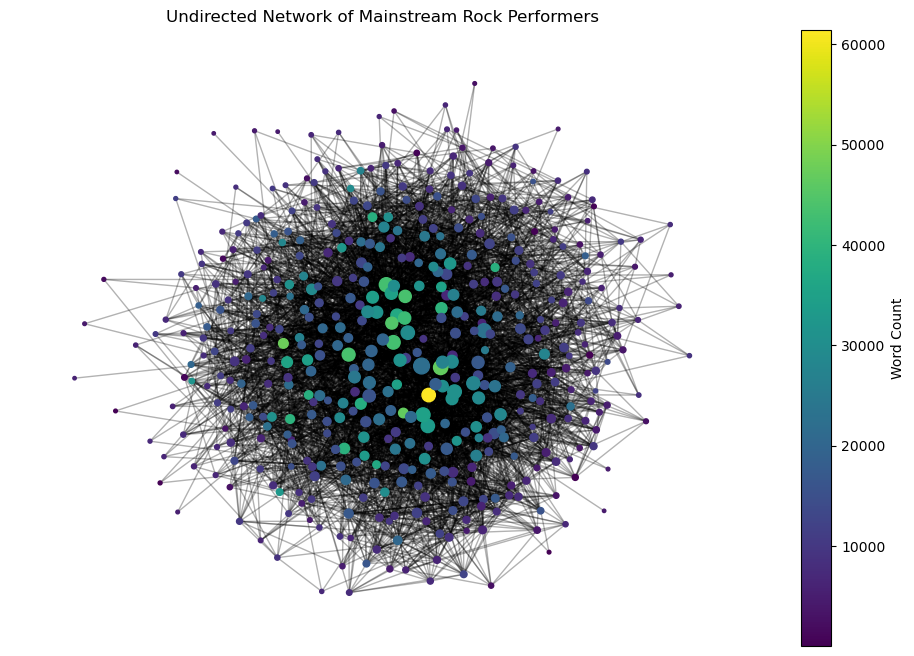

In [2]:
# plot the undirected graph
plt.figure(figsize=(12,8))
pos = nx.kamada_kawai_layout(G_undirected)

# node sizes based on degree
node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]

# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

**Play with the force atlas algorithm parameters to obtain a visualization you like.**

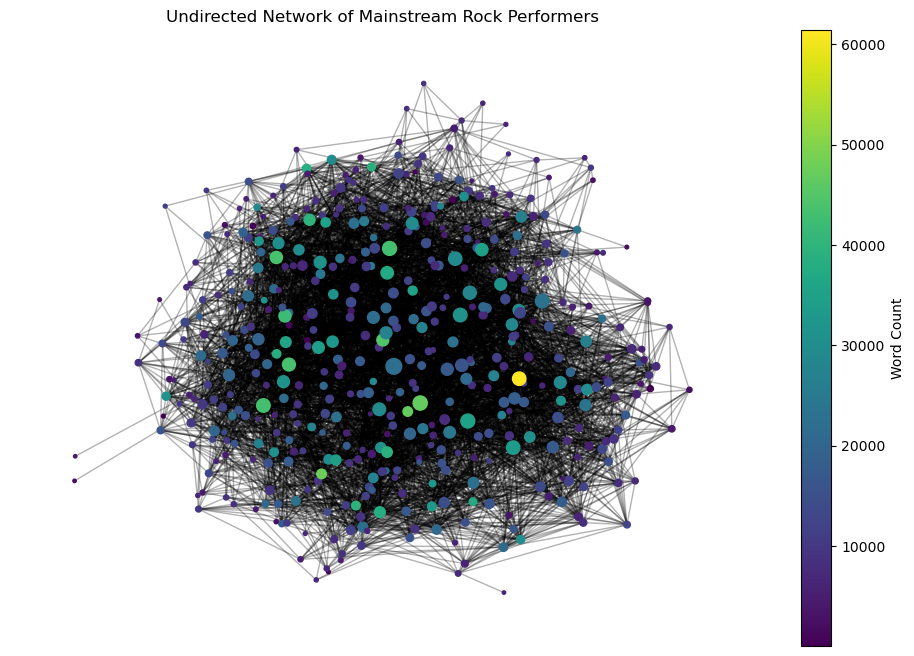

In [3]:
# plot the undirected graph
plt.figure(figsize=(12,8))
pos = nx.forceatlas2_layout(G_undirected)

# node sizes based on degree
node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]

# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

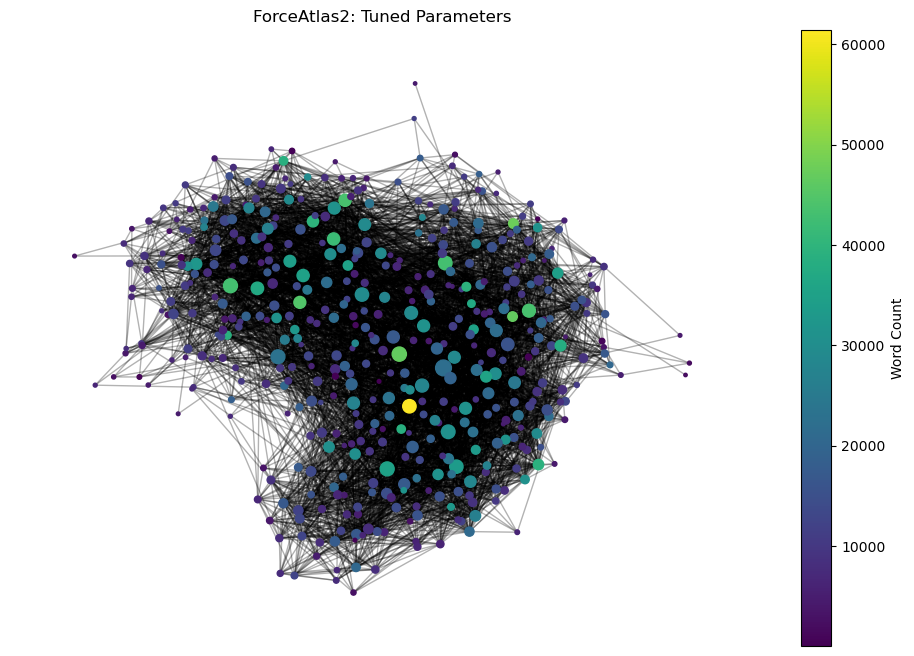

In [4]:
# Try different parameters for forceatlas2_layout to improve visualization
plt.figure(figsize=(12,8))
pos = nx.forceatlas2_layout(
    G_undirected,
    gravity=0.1              # Adjust gravity to pull nodes together
)

node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

plt.colorbar(nodes, label='Word Count')
plt.title('ForceAtlas2: Tuned Parameters')
plt.axis('off')
plt.show()

### **Exercise 2: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.**

1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
  - Consider the set of neighbours pointing towards the node found above.
  - What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
  - Repeat the exercise for the highest out-degree node.
  - Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
2. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
3. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
4. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

In [5]:
# node with highest in-degree
in_degrees = G.in_degree()
max_in_node = max(in_degrees, key=lambda x: x[1])[0]
print(f"Node with highest in-degree: {max_in_node}, In-Degree: {G.in_degree(max_in_node)}")

# find neighbors pointing to this node
in_neighbors = list(G.predecessors(max_in_node))
print(f"Neighbors pointing to {max_in_node}: {in_neighbors}")



Node with highest in-degree: Led_Zeppelin, In-Degree: 117
Neighbors pointing to Led_Zeppelin: ['311_(band)', 'ABBA', 'Bryan_Adams', 'Aerosmith', 'Alice_in_Chains', 'The_Allman_Brothers_Band', 'Alter_Bridge', 'Arctic_Monkeys', 'Audioslave', 'Avenged_Sevenfold', 'Bachman–Turner_Overdrive', 'Bad_Company', 'The_Band', 'The_Black_Crowes', 'Black_Sabbath', 'Blur_(band)', 'Bon_Jovi', 'Jeff_Buckley', 'Bullet_for_My_Valentine', 'Bush_(British_band)', 'Cheap_Trick', 'Eddie_Cochran', 'Coheed_and_Cambria', 'Phil_Collins', 'Alice_Cooper', 'Chris_Cornell', 'Cream_(band)', 'Creed_(band)', 'The_Cult', 'Deep_Purple', 'Def_Leppard', 'Fats_Domino', 'Donovan', 'Drowning_Pool', 'Duran_Duran', 'Electric_Light_Orchestra', 'Europe_(band)', 'The_Everly_Brothers', 'Faith_No_More', 'FireHouse', 'Foo_Fighters', 'Foreigner_(band)', 'Godsmack', 'Golden_Earring', 'Greta_Van_Fleet', "Guns_N'_Roses", 'Heart_(band)', 'Hinder', 'INXS', 'Iron_Maiden', "Jane's_Addiction", 'Jethro_Tull_(band)', 'Judas_Priest', 'Kaiser_Chie

A lot of these bands have helped doing something or are featuring or have played instruments on led zeppelins albums and songs.

In [6]:
# node with highest out-degree
out_degrees = G.out_degree()
max_out_node = max(out_degrees, key=lambda x: x[1])[0]
print(f"Node with highest out-degree: {max_out_node}, Out-Degree: {G.out_degree(max_out_node)}")

# find neighbors pointing to this node
out_neighbors = list(G.successors(max_out_node))
print(f"Neighbors pointing to {max_out_node}: {out_neighbors}")

Node with highest out-degree: Alice_in_Chains, Out-Degree: 71
Neighbors pointing to Alice_in_Chains: ['Nirvana_(band)', 'Pearl_Jam', 'Soundgarden', "Guns_N'_Roses", 'David_Bowie', 'Van_Halen', 'Iggy_Pop', 'Poison_(American_band)', 'Extreme_(band)', 'Anthrax_(American_band)', 'Megadeth', 'Slayer', 'Heart_(band)', 'Chris_Cornell', 'Ozzy_Osbourne', 'Metallica', 'Kiss_(band)', 'Lynyrd_Skynyrd', 'Pink_Floyd', 'The_Cult', 'Tool_(band)', 'Puddle_of_Mudd', 'Pantera', 'Velvet_Revolver', 'Led_Zeppelin', 'The_Doors', 'Foo_Fighters', 'Elton_John', 'Nine_Inch_Nails', 'Lamb_of_God_(band)', 'Avenged_Sevenfold', 'Deftones', 'Rush_(band)', 'Korn', 'Dallas_Green_(musician)', 'Black_Sabbath', 'Deep_Purple', 'AC/DC', 'Accept_(band)', 'Aerosmith', 'The_Beatles', 'Dio_(band)', 'Funkadelic', 'Jimi_Hendrix', 'Iron_Maiden', 'Jethro_Tull_(band)', 'Eddie_Money', 'Ted_Nugent', 'Pixies_(band)', 'Queen_(band)', 'Scorpions_(band)', 'Thin_Lizzy', 'U2', 'ZZ_Top', 'Godsmack', 'Staind', 'Three_Days_Grace', '10_Years_(ba

Here they really have had a long music career and their page is really long

**Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.**

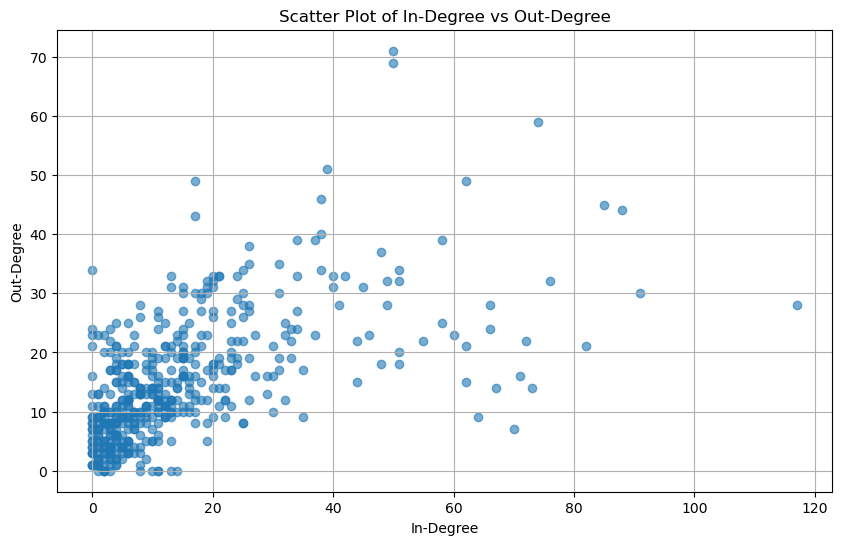

In [7]:
# create scatter plot of in-degree vs out-degree
in_degrees = [deg for node, deg in G.in_degree()]
out_degrees = [deg for node, deg in G.out_degree()]

plt.figure(figsize=(10,6))
plt.scatter(in_degrees, out_degrees, alpha=0.6)
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('Scatter Plot of In-Degree vs Out-Degree')
plt.grid(True)
plt.show()

There is a small linear tendency but it is quite scattered

**Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?**

In [8]:
# finding nodes with high out-degree and low in-degree (define thresholds)
high_out_threshold = 30
low_in_threshold = 15

high_out_low_in_nodes = [node for node in G.nodes() if G.out_degree(node) >= high_out_threshold and G.in_degree(node) <= low_in_threshold]
print(f"Nodes with high out-degree (>{high_out_threshold}) and low in-degree (<={low_in_threshold}): {high_out_low_in_nodes}")


Nodes with high out-degree (>30) and low in-degree (<=15): ['Avril_Lavigne', 'Mötley_Crüe', 'Slade', 'Sum_41', 'Trivium_(band)']


Why is this??? i dont know

**Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?**

In [9]:
# finding nodes with low out-degree and high in-degree (define thresholds)
low_out_threshold = 15
high_in_threshold = 60

low_out_high_in_nodes = [node for node in G.nodes() if G.out_degree(node) <= low_out_threshold and G.in_degree(node) >= high_in_threshold]
print(f"Nodes with low out-degree (<={low_out_threshold}) and high in-degree (>{high_in_threshold}): {low_out_high_in_nodes}")


Nodes with low out-degree (<=15) and high in-degree (>60): ['John_Lennon', 'Pink_Floyd', 'Elvis_Presley', 'Bruce_Springsteen', 'U2']


# Part B: Advanced tools

**Exercise 3**: Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph (rememeber, we asked you to keep one?).

1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
2. Let's also look at the exponent of the degree distribution
  * To calculate it, you can install powerlaw package (I could not install in conda, so I used pip install powerlaw)
  * Use powerlaw.Fit(degree).alpha for fitting
  * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
  * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
  * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are?
  * A long time ago, a group of scientists analyzed the network spanned by all of Wikipedia (the paper is called Wikipedias: Collaborative web-based encyclopedias as complex networks; to access this paper, use findit.dtu.dk or read the preprint on arXiv). Do your findings correspond to the results described in Chapter III.A of that paper? If not, try to give your explanation of why?
3. Plot a heatmap (Hint here) of the the in- versus out- degree for all characters. Zoom in on just the in-degree and out-degree area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?
4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.
5. We have one more metric that we have used, but not investigated so far. The node-attribute length_of_content. There are two things to look at.
  - Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it?
  - Secondly, and more interestingly, it could be that longer texts means more famous characters. And that means more in-links.
  - How should you test this? Well, here you are allowed to be creative. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.


What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

In [10]:


# average, median, mode, min, max of in-degree and out-degree
import statistics as stats
in_degrees = [deg for node, deg in G.in_degree()]
out_degrees = [deg for node, deg in G.out_degree()]

# in-degree stats
max_in_degree = max(in_degrees)
min_in_degree = min(in_degrees)
avg_in_degree = sum(in_degrees) / len(in_degrees)
median_in_degree = stats.median(in_degrees)
mode_in_degree = stats.mode(in_degrees)

# out-degree stats
max_out_degree = max(out_degrees)
min_out_degree = min(out_degrees)
avg_out_degree = sum(out_degrees) / len(out_degrees)
median_out_degree = stats.median(out_degrees)
mode_out_degree = stats.mode(out_degrees)

print(f"In-Degree - Max: {max_in_degree}, Min: {min_in_degree}, Avg: {avg_in_degree:.2f}, Median: {median_in_degree}, Mode: {mode_in_degree}")
print(f"Out-Degree - Max: {max_out_degree}, Min: {min_out_degree}, Avg: {avg_out_degree:.2f}, Median: {median_out_degree}, Mode: {mode_out_degree}")

In-Degree - Max: 117, Min: 0, Avg: 14.86, Median: 10, Mode: 4
Out-Degree - Max: 71, Min: 0, Avg: 14.86, Median: 13, Mode: 9


We have the same avg for both in and out degrees, as there is the same number of in-degree edges and out degree edges in the garph. the number of in-degree edges are the number of edges in the graph and the same goes for out-degree edges. When you divide by the number of nodes you get the same average, as the number of nodes in the graph is not dynamic.

There is more variance in the in-degree distribution as the mode is 4 (the most common number of in-degrees), but one node has 117 links going to it. Therefore we know that this node is an outlier. The mode, avg and median for the in-degrees are also further apart, which also indicates outliers.

In the out-degree distribution the meduan and mean are quite close, which indicates that there are not a lot of outliers.

There are more observations towards the lower amount of degrees for both cases.

2. **Let's also look at the exponent of the degree distribution**
  * To calculate it, you can install powerlaw package (I could not install in conda, so I used pip install powerlaw)
  * Use powerlaw.Fit(degree).alpha for fitting
  * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
  * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
  * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are?
  * A long time ago, a group of scientists analyzed the network spanned by all of Wikipedia (the paper is called Wikipedias: Collaborative web-based encyclopedias as complex networks; to access this paper, use findit.dtu.dk or read the preprint on arXiv). Do your findings correspond to the results described in Chapter III.A of that paper? If not, try to give your explanation of why?

In [ ]:
import powerlaw

degrees = [deg for node, deg in G_undirected.degree()]

exponent_in_degree = powerlaw.Fit(in_degrees, discrete=True).alpha # fit power-law to in-degrees, discrete=True because integer data
exponent_out_degree = powerlaw.Fit(out_degrees, discrete=True).alpha
exponent_degree = powerlaw.Fit(degrees, discrete=True).alpha

print(f"Power-law Exponent - In-Degree: {exponent_in_degree:.2f}, Out-Degree: {exponent_out_degree:.2f}, Degree: {exponent_degree:.2f}")



Power-law Exponent - In-Degree: 2.57, Out-Degree: 5.10, Degree: 3.47


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/noa/opt/anaconda3/envs/python_env_3_12/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/Users/noa/opt/anaconda3/envs/python_env_3_12/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


**what does each exponent say about our network?** 
Equation (4.1) is the  power law distribution with exponent gamma

In (Box 4.5) we get:
- Anomalous Regime (γ = 2)
- Ultra-Small World (2 ‹ γ ‹ 3)
- Critical Point (γ = 3)
- Small World (γ > 3)



For our network we have:
- In-Degree: 2.66 (Scale-free ; Ultra-Small World)
- Out-Degree: 6.29 (Random ; Small world)
- Degree: 3.56 (Random ; Small world)



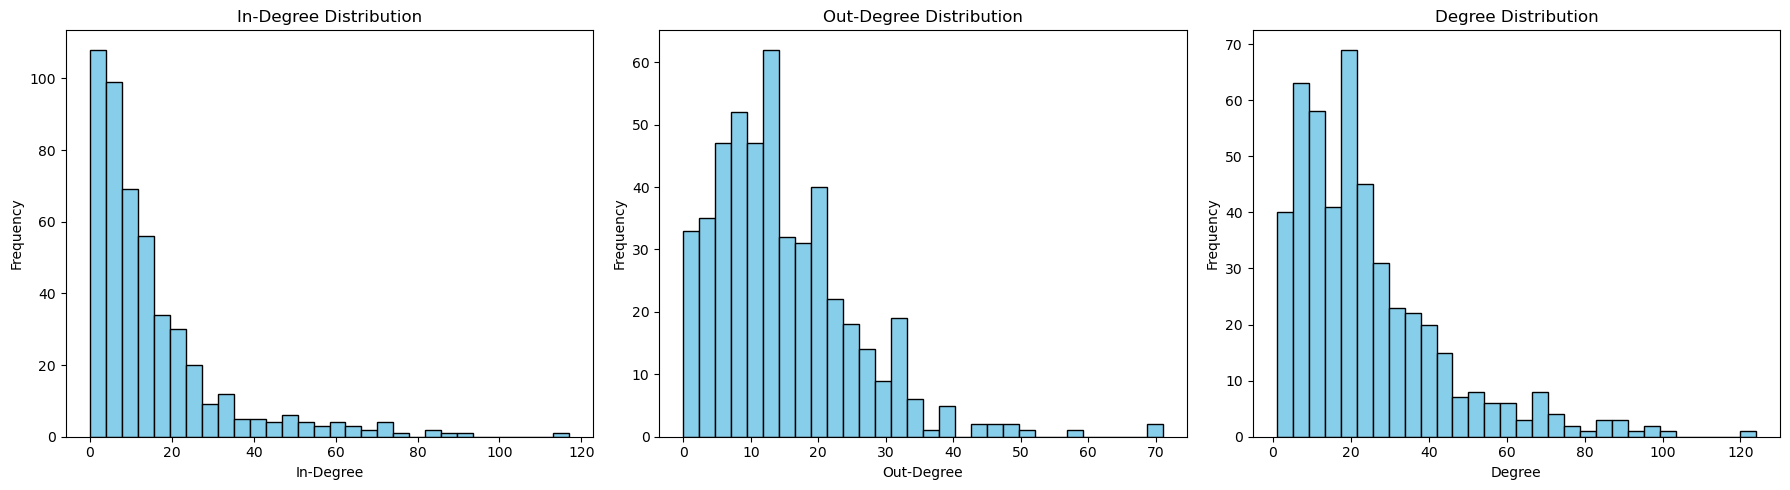

In [49]:
# plotting degree distributions

plt.figure(figsize=(18,5))

# in-degree distribution
plt.subplot(1,3,1)
plt.hist(in_degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')

plt.subplot(1,3,2)
plt.hist(out_degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution')

plt.subplot(1,3,3)
plt.hist(degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.tight_layout()
plt.show()

**When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?**


  * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are?

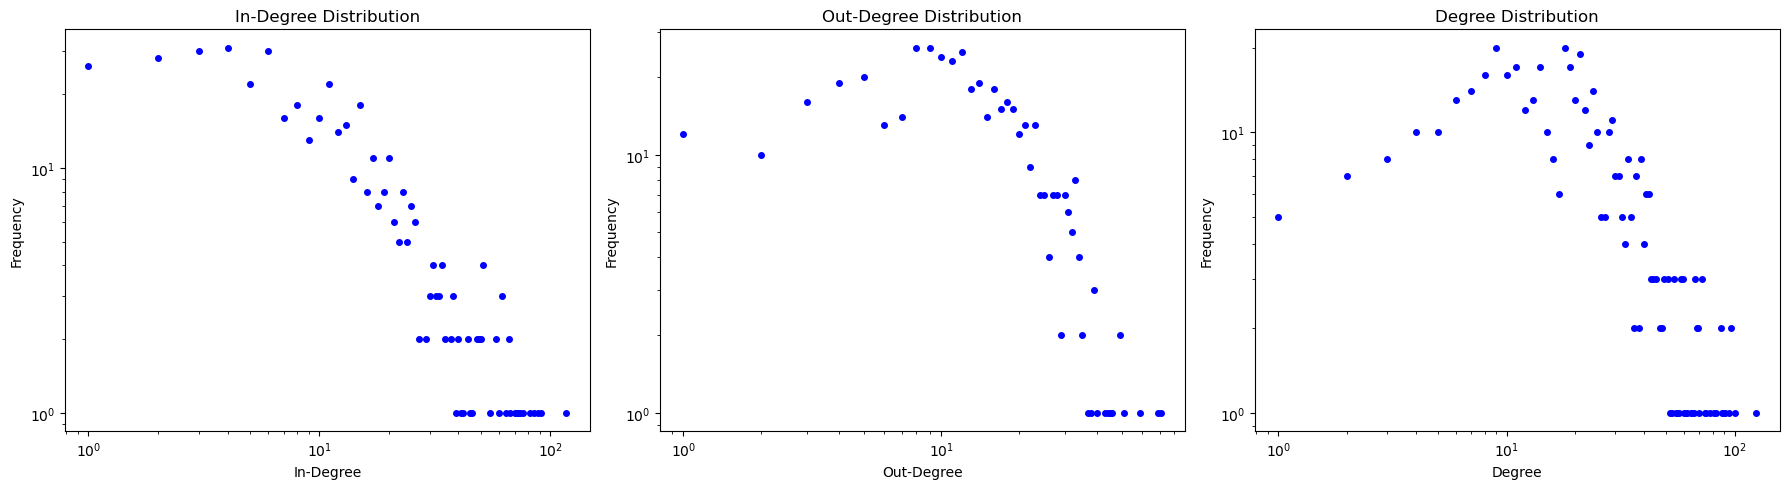

In [51]:
# in-degree distribution
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
x = np.arange(0, max(in_degrees)+1)
plt.plot(x, [in_degrees.count(i) for i in x], 'bo', markersize=4)
#plt.hist(in_degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.title('In-Degree Distribution')

# out-degree distribution
plt.subplot(1,3,2)
x = np.arange(0, max(out_degrees)+1)
plt.plot(x, [out_degrees.count(i) for i in x], 'bo', markersize=4)
#plt.hist(out_degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.title('Out-Degree Distribution')

# degree distribution
plt.subplot(1,3,3)
x = np.arange(0, max(degrees)+1)
plt.plot(x, [degrees.count(i) for i in x], 'bo', markersize=4)
#plt.hist(degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.title('Degree Distribution')
plt.tight_layout()
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


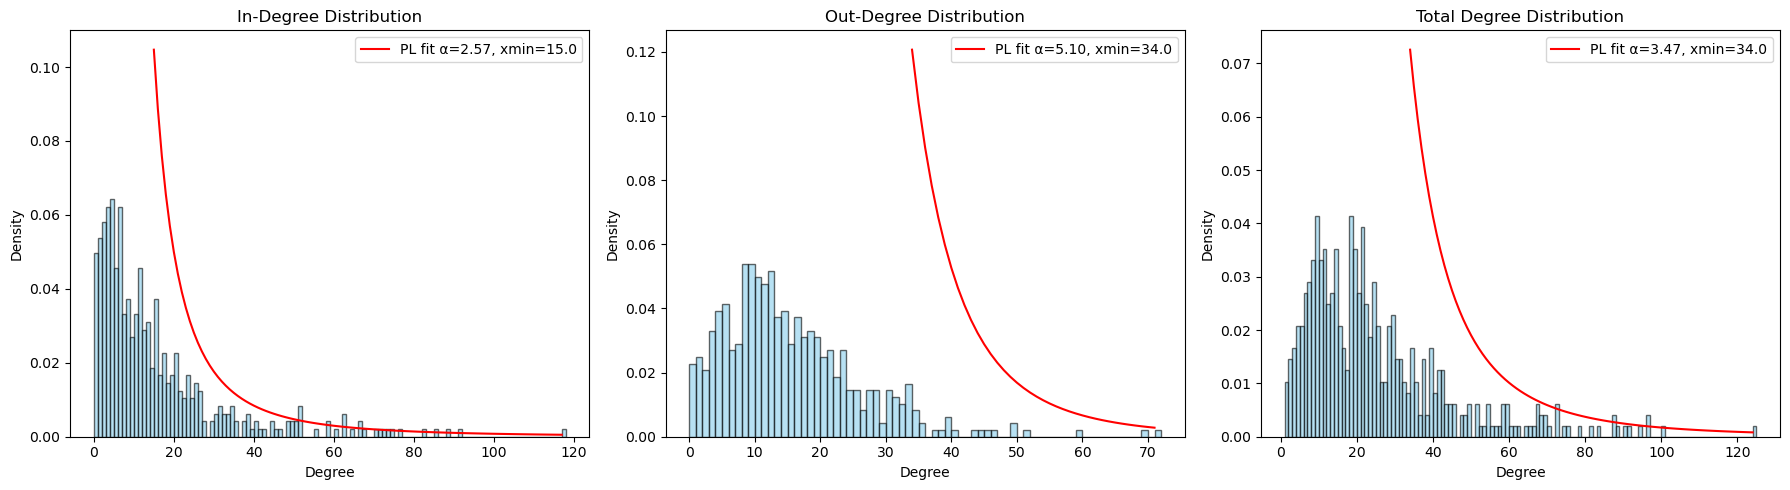

In [34]:
import powerlaw

# fit once, reuse for in/out/total
fit_in  = powerlaw.Fit(in_degrees,  discrete=True)
fit_out = powerlaw.Fit(out_degrees, discrete=True)
fit_all = powerlaw.Fit(degrees,     discrete=True)

def plot_pl(ax, data, fit, title):
    α, xmin = fit.alpha, fit.xmin
    # continuous approx: p(k) = (α-1)*xmin**(α-1) * k**(-α)
    ks = np.arange(xmin, max(data)+1)
    pdf = (α-1)*xmin**(α-1)*ks**(-α)

    ax.hist(data,
            bins=range(min(data), max(data)+2),
            density=True,
            color='skyblue', edgecolor='black',
            alpha=0.6)
    ax.plot(ks, pdf, 'r-',
            label=f'PL fit α={α:.2f}, xmin={xmin}')
    ax.set_title(title)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Density')
    ax.legend()

# draw figure
fig, axes = plt.subplots(1,3,figsize=(18,5))
plot_pl(axes[0], in_degrees,  fit_in,  'In-Degree Distribution')
plot_pl(axes[1], out_degrees, fit_out, 'Out-Degree Distribution')
plot_pl(axes[2], degrees,     fit_all, 'Total Degree Distribution')
plt.tight_layout()
plt.show()

The in-degree distribution fits okay to a power-law, but the two others does not!
We will try with log normal and eponential.

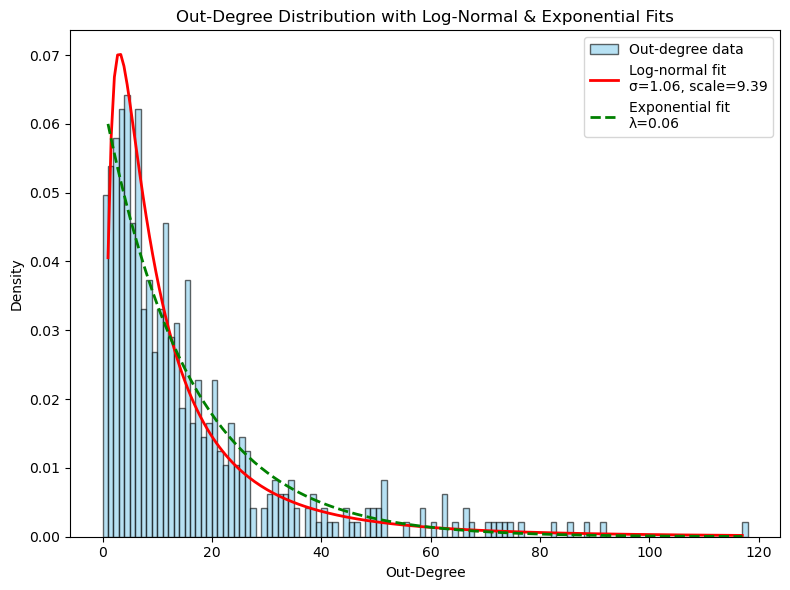

In [41]:
import scipy.stats as stats

# original out_degrees may contain zeros → remove for fitting
#data_pos = [d for d in out_degrees if d > 0]
data_pos = [d for d in in_degrees if d > 0] 

# 1) fit log-normal (force loc=0)
shape, loc, scale = stats.lognorm.fit(data_pos, floc=0)

# 2) fit exponential (force loc=0)
loc_exp, scale_exp = stats.expon.fit(data_pos, floc=0)

# 3) smooth x-axis over positive range
x = np.linspace(min(data_pos), max(data_pos), 200)

# 4) compute PDFs
pdf_lognorm = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
pdf_exp     = stats.expon.pdf(x, loc=loc_exp, scale=scale_exp)

# 5) plot
plt.figure(figsize=(8,6))
# histogram of all out-degrees (includes zeros)
plt.hist(in_degrees,
         bins=range(min(in_degrees), max(in_degrees)+2),
         density=True, alpha=0.6,
         color='skyblue', edgecolor='black',
         label='Out-degree data')
plt.plot(x, pdf_lognorm, 'r-', lw=2,
         label=f'Log-normal fit\nσ={shape:.2f}, scale={scale:.2f}')
plt.plot(x, pdf_exp, 'g--', lw=2,
         label=f'Exponential fit\nλ={1/scale_exp:.2f}')
plt.xlabel('Out-Degree')
plt.ylabel('Density')
plt.title('Out-Degree Distribution with Log-Normal & Exponential Fits')
plt.legend()
plt.tight_layout()
plt.show()

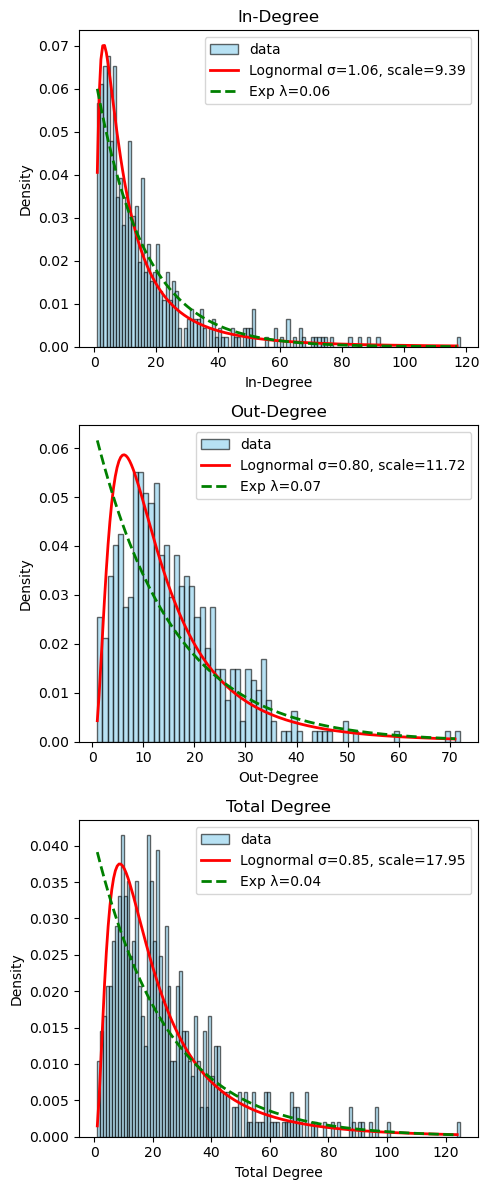

In [45]:
import scipy.stats as stats

# prepare positive values for fitting (drop zeros)
data_dict = {
    'In-Degree':  [d for d in in_degrees  if d > 0],
    'Out-Degree': [d for d in out_degrees if d > 0],
    'Total Degree': [d for d in degrees     if d > 0]
}

fig, axes = plt.subplots(3, 1, figsize=(5,12))
for ax, (label, data) in zip(axes, data_dict.items()):
    # histogram on linear scales
    bins = range(min(data), max(data)+2)
    ax.hist(data,
            bins=bins,
            density=True,
            alpha=0.6,
            color='skyblue',
            edgecolor='black',
            label='data')
    # fit log-normal
    shape, loc, scale = stats.lognorm.fit(data, floc=0)
    x = np.linspace(min(data), max(data), 200)
    pdf_ln = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
    ax.plot(x, pdf_ln, 'r-', lw=2,
            label=f'Lognormal σ={shape:.2f}, scale={scale:.2f}')
    # fit exponential
    loc_e, scale_e = stats.expon.fit(data, floc=0)
    pdf_e = stats.expon.pdf(x, loc=loc_e, scale=scale_e)
    ax.plot(x, pdf_e, 'g--', lw=2,
            label=f'Exp λ={1/scale_e:.2f}')
    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

**A long time ago, a group of scientists analyzed the network spanned by all of Wikipedia (the paper is called Wikipedias: Collaborative web-based encyclopedias as complex networks; to access this paper, use findit.dtu.dk or read the preprint on arXiv). Do your findings correspond to the results described in Chapter III.A of that paper? If not, try to give your explanation of why?**

We agree with the scientists. We see that the in-degree distribution corresponds with the power-law distribution. but the out-degree doesn't fit as well. 


### 3. **Plot a heatmap** (Hint here) of the the in- versus out- degree for all characters. Zoom in on just the in-degree and out-degree area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?

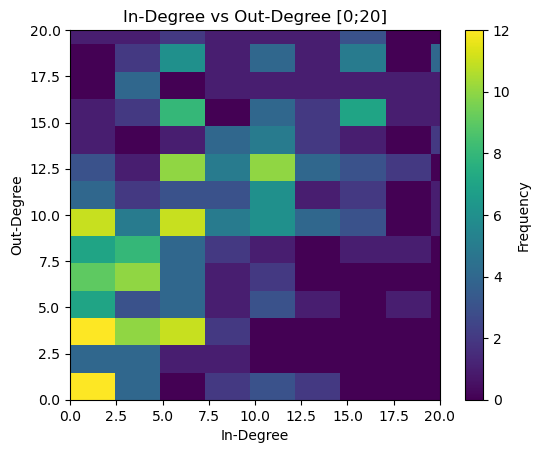

In [60]:
# help make this above

heatmap, xedges, yedges = np.histogram2d(in_degrees, out_degrees, bins=len(degrees)//10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.ylim(0, 20)  # zoom in on out-degree
plt.xlim(0, 20)  # zoom in on in-degree
plt.title('In-Degree vs Out-Degree [0;20]')
plt.colorbar(label='Frequency')
plt.show()

- The color at each (k₁,k₂) cell shows how many nodes have in-degree ≈ k₁ and out-degree ≈ k₂.

- The very bright “hotspot” in the lower-left corner (around 1–5 in both directions) tells us that the vast majority of pages link to—and are linked from—only a handful of other pages.

- the heatmap extends a bit horisontally, this means that there are more nodes with higher in-degree but low-out degree

- Compared to a scatter, this makes clear exactly where the bulk of the distribution lies: almost all nodes live in that small-degree block, and only a handful push out toward (15, 15) or beyond.



### 4. Why do you think I want you guys to use a directed graph?** Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.

You cannot recognise differences in in-and out degrees. you cannot see if it is one person or node that is very popular by the others or if one node depend on a lot of other nodes. 

Using the directed graph lets you exploit the arrow‐structure of Wikipedia links—who “points to” whom—rather than just whether two pages are connected at all.

### 5. We have one more metric that we have used, but not investigated so far. The node-attribute length_of_content. There are two things to look at.
  - Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it?
  - Secondly, and more interestingly, it could be that longer texts means more famous characters. And that means more in-links.
  - How should you test this? Well, here you are allowed to be creative. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.


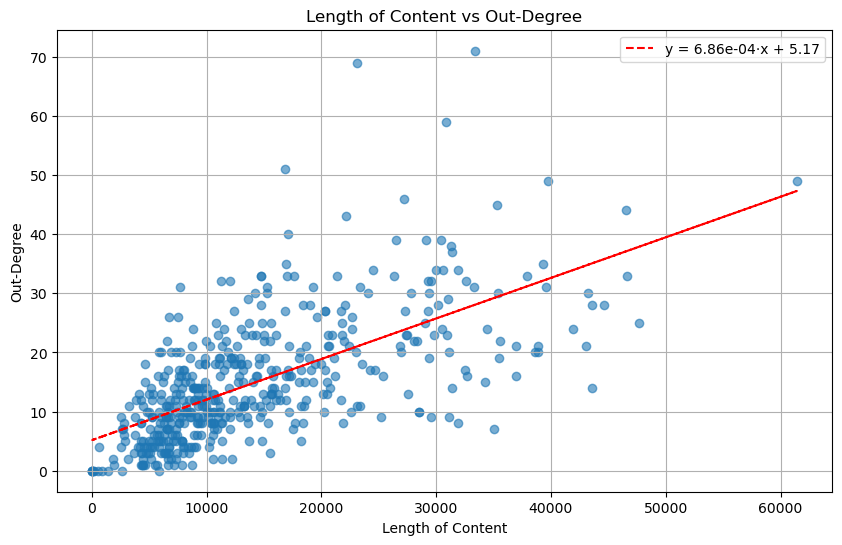

In [69]:
# plot node_length vs out-degree
lengths = [G.nodes[n]['word_count'] for n in G.nodes()]
plt.figure(figsize=(10,6))
plt.scatter(lengths, out_degrees, alpha=0.6)
plt.xlabel('Length of Content')
plt.ylabel('Out-Degree')
plt.title('Length of Content vs Out-Degree')
plt.grid(True)

#fit line
z = np.polyfit(lengths, out_degrees, 1)
slope, intercept = z
p = np.poly1d(z)
plt.plot(lengths, p(lengths), "r--",label=f"y = {slope:.2e}·x + {intercept:.2f}")
plt.legend()
plt.show()

Here there is a semi-linear relationship, the longer the content the more out-degrees (and therefore other articles) will the wiki page reference.

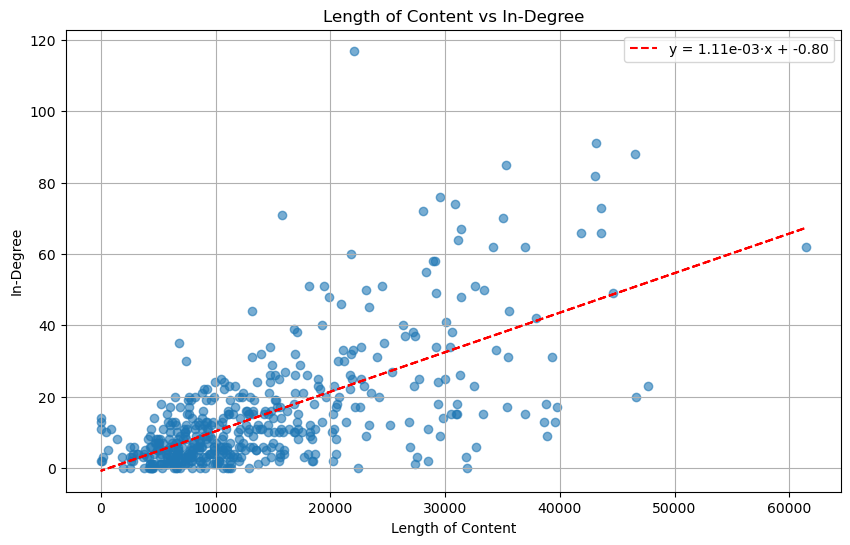

In [70]:
# plot node_length vs in-degree
plt.figure(figsize=(10,6))
plt.scatter(lengths, in_degrees, alpha=0.6)
plt.xlabel('Length of Content')
plt.ylabel('In-Degree')
plt.title('Length of Content vs In-Degree')
plt.grid(True)

#fit line
z = np.polyfit(lengths, in_degrees, 1)
slope, intercept = z
p = np.poly1d(z)
plt.plot(lengths, p(lengths), "r--",label=f"y = {slope:.2e}·x + {intercept:.2f}")
plt.legend()
plt.show()

Here there is still a positive relationship/tendency, meaning that the more famous the character (a longer text) the more in-degrees, because other bands will reference this band.

In [71]:
# correlation coefficients
from scipy.stats import pearsonr, spearmanr
pearson_out = pearsonr(lengths, out_degrees)
spearman_out = spearmanr(lengths, out_degrees)
pearson_in = pearsonr(lengths, in_degrees)
spearman_in = spearmanr(lengths, in_degrees)

print(np.corrcoef(lengths, out_degrees))
print(np.corrcoef(lengths, in_degrees))


[[1.         0.64609381]
 [0.64609381 1.        ]]
[[1.         0.64990265]
 [0.64990265 1.        ]]


The second phenomenon is stronger as the fitted curve is steeper...

# Exercise 4: Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality).

Now let's dig in and try to understand more about the network using more advanced features.

Note: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise.

1. Find the 5 most central characters according to degree centrality.
2. Find the 5 most central characters according to betweenness centrality.
- Repeat Exercise 1 (plotting the network). However, this time use betweenness centrality to define the size of the node.
- What role do you imagine characters with high wikipedia graph betweenness centrality play in the network?
3. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).
- Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
- What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
4. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?
- Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
5. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
6. Is the undirected version of the graph assortative with respect do the length_of_content nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and vice versa?.
- Hint: Use this function. Provide an interpretation of your answer.
7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes N and probablity of connection p?
- Take a look at the distribution of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.
